In [1]:
import pandas as pd
import numpy as np
import sys
from matplotlib import pyplot as plt
import os

In [50]:
datadir = 'results/run_exit/vmlinux-5.2.3/gapbs'

In [300]:
def getWorkingStatus(datadir, cpu, num_cpu, mem, workload, size):
    out_file = os.path.join(datadir, cpu, num_cpu, mem, workload, 'synthetic', size, 'simout')
    err_file = os.path.join(datadir, cpu, num_cpu, mem, workload, 'synthetic', size, 'simerr')
    stat_file = os.path.join(datadir, cpu, num_cpu, mem, workload, 'synthetic', size, 'stats.txt')
    sys_file = os.path.join(datadir, cpu, num_cpu, mem, workload, 'synthetic', size, 'system.pc.com_1.device')
    status = ''
    lookup = 'Dump stats at the end of ROI!'
    print(out_file)
#     try: 
#         with open(out_file) as simout:
#             for num, line in enumerate(simout, 1):
#                 if lookup in line:
#                     status = 'success'
#     except: #temporary change
#         status = 'N/A'
    try:
        with open(stat_file) as f:
            for line in f:
                if 'Begin Simulation Statistics' in line:
                    status = 'success'
                    break
                else: 
                    status = 'N/A'
    except:
        status = 'N/A'       
    try: 
        with open(err_file) as f:
            l_line = f.readlines()[-1]
            if '--- END LIBC BACKTRACE ---' in l_line:
                status = 'failure'
    except:
        status = 'N/A'    
    if (cpu == 'atomic' and mem != 'classic'):
        status = 'not-supported'
    if (status == ''):
        status = 'N/A'
    
#     try:
#         with open(sys_file) as f:
#             l_line = f.readlines()[-1]
#             if '---[ end Kernel panic' in l_line:
#                 status = 'kernel-panic'
#     except:
#         status = 'N/A'                                                                          
                                                                                     
    return str(status)

In [301]:
def getStat(datadir, workload, size, cpu, num_cpus, stat):
    filename = os.path.join(datadir, workload, size, cpu, num_cpus, 'stats.txt')
    try: 
        with open(filename) as f:
            r = f.read()
            if len(r) < 10: return 0.0
            start = r.find(stat) + len(stat) + 1
            end = r.find('#', start)
            return float(r[start:end])
    except: #temporary change
        return 0.0

In [302]:
num_cpus = ['1', '2', '4']
workloads = ['bc', 'bfs', 'cc', 'sssp', 'tc','pr']
sizes = ['3', '15', '20']
cpu_types = ['kvm', 'atomic', 'simple', 'o3']
# graphs = ['roadU.sg', 'webU.sg']
mem_types = ['classic', 'MI_example','MESI_Two_Level']

In [303]:
table = []
for cpu in cpu_types:
    for num_cpu in num_cpus:
        for mem in mem_types:
            for workload in workloads:
                for size in sizes:
                    table.append([cpu, num_cpu, mem, workload, size,
                              getWorkingStatus(datadir, cpu, num_cpu, mem, workload, size)])
#                     if (getWorkingStatus(datadir, cpu, num_cpu, mem, workload, size) == 'failure'):
                    print(getWorkingStatus(datadir, cpu, num_cpu, mem, workload, size))

df = pd.DataFrame(table, columns = ['CPU Model', 'CPU Cores', 'memory type', 'Workload', 'Input Size', 
                                    'Status'])

results/run_exit/vmlinux-5.2.3/gapbs/kvm/1/classic/bc/synthetic/3/simout
results/run_exit/vmlinux-5.2.3/gapbs/kvm/1/classic/bc/synthetic/3/simout
success
results/run_exit/vmlinux-5.2.3/gapbs/kvm/1/classic/bc/synthetic/15/simout
results/run_exit/vmlinux-5.2.3/gapbs/kvm/1/classic/bc/synthetic/15/simout
success
results/run_exit/vmlinux-5.2.3/gapbs/kvm/1/classic/bc/synthetic/20/simout
results/run_exit/vmlinux-5.2.3/gapbs/kvm/1/classic/bc/synthetic/20/simout
success
results/run_exit/vmlinux-5.2.3/gapbs/kvm/1/classic/bfs/synthetic/3/simout
results/run_exit/vmlinux-5.2.3/gapbs/kvm/1/classic/bfs/synthetic/3/simout
success
results/run_exit/vmlinux-5.2.3/gapbs/kvm/1/classic/bfs/synthetic/15/simout
results/run_exit/vmlinux-5.2.3/gapbs/kvm/1/classic/bfs/synthetic/15/simout
success
results/run_exit/vmlinux-5.2.3/gapbs/kvm/1/classic/bfs/synthetic/20/simout
results/run_exit/vmlinux-5.2.3/gapbs/kvm/1/classic/bfs/synthetic/20/simout
success
results/run_exit/vmlinux-5.2.3/gapbs/kvm/1/classic/cc/syntheti

results/run_exit/vmlinux-5.2.3/gapbs/simple/2/MESI_Two_Level/bc/synthetic/3/simout
N/A
results/run_exit/vmlinux-5.2.3/gapbs/simple/2/MESI_Two_Level/bc/synthetic/15/simout
results/run_exit/vmlinux-5.2.3/gapbs/simple/2/MESI_Two_Level/bc/synthetic/15/simout
N/A
results/run_exit/vmlinux-5.2.3/gapbs/simple/2/MESI_Two_Level/bc/synthetic/20/simout
results/run_exit/vmlinux-5.2.3/gapbs/simple/2/MESI_Two_Level/bc/synthetic/20/simout
N/A
results/run_exit/vmlinux-5.2.3/gapbs/simple/2/MESI_Two_Level/bfs/synthetic/3/simout
results/run_exit/vmlinux-5.2.3/gapbs/simple/2/MESI_Two_Level/bfs/synthetic/3/simout
N/A
results/run_exit/vmlinux-5.2.3/gapbs/simple/2/MESI_Two_Level/bfs/synthetic/15/simout
results/run_exit/vmlinux-5.2.3/gapbs/simple/2/MESI_Two_Level/bfs/synthetic/15/simout
N/A
results/run_exit/vmlinux-5.2.3/gapbs/simple/2/MESI_Two_Level/bfs/synthetic/20/simout
results/run_exit/vmlinux-5.2.3/gapbs/simple/2/MESI_Two_Level/bfs/synthetic/20/simout
N/A
results/run_exit/vmlinux-5.2.3/gapbs/simple/2/MES

In [304]:
def plotWorkingStat(cpu, x, y):
#     if cpu == 'KVM':
#         num_cpus = kvm_num_cpus
#         sizes = kvm_sizes
#     elif cpu == 'TimingSimple':
#         num_cpus = timing_num_cpus
#         sizes = timing_sizes
#     else:
#         print('CPU model not supported')
    
    plt.figure(figsize = (x, y))
    i = 0
#     j = 0
    barWidth = 1
    ticks = []
    labels = []
    for mem in mem_types:
        for cores in num_cpus:
            for j,bench in enumerate(workloads[0:4]):
                workStat = df[(df['CPU Model'] == cpu) & (df['CPU Cores'] == cores) 
                              & (df['Workload'] == bench) & (df['Input Size'] == '3') 
                              & (df['memory type'] == mem)]['Status']
#                 print(df[(df['CPU Model'] == cpu) & (df['CPU Cores'] == cores) 
#                               & (df['Workload'] == bench) & (df['Input Size'] == '3') 
#                               & (df['memory type'] == mem)]['Status'])
                workStat = list(workStat)[0]
#                 print(workStat)
                if workStat == 'success':
                    plt.bar(i, 1, bottom=j, color='green',edgecolor='white',width=barWidth)
                elif workStat == 'failure':
                    plt.bar(i, 1, bottom=j, color='red',edgecolor='white',width=barWidth)
                elif workStat == 'kernel-panic':
                    plt.bar(i, 1, bottom=j, color='darkred',edgecolor='white',width=barWidth)
                elif workStat == 'N/A':
                    plt.bar(i, 1, bottom=j, color='orange',edgecolor='white',width=barWidth)
                elif workStat == 'not-supported':
                    plt.bar(i, 1, bottom=j, color='purple',edgecolor='white',width=barWidth)
            i = i + 1
        i = i + 1
    colours = ['green','red','darkred','orange', 'purple']#'R', 'Y']
    for i,cpu in enumerate(['success', 'failure', 'kernel-panic','timeout', 'not-supported']):
        plt.bar(0,0,color=colours[i], label=cpu)

    plt.xticks(list(set(np.arange(len(mem_types)*(len(num_cpus)+1)))-set([3,7,11,15,19])), num_cpus+num_cpus+num_cpus+num_cpus+num_cpus, rotation=0, ha='left')
#     if cpu == 'kvm':
#     plt.yticks([0.25, 0.75, 1.25, 1.75, 2.25, 2.75], ['bc', 'bfs', 'cc', 'sssp', 'tc','pr'])
#     else:
#         plt.yticks([0.25], ['simsmall'])
#     plt.suptitle('Working Status of the benchmarks using ' + cpu + 'CPU model')
#     plt.xlabel('Number of cores')
#     plt.xticks(ticks, labels, rotation = 'vertical')
#     if cpu == 'TimingSimple':
#         plt.legend((succ, kpan), ('success', 'kernel-panic'))

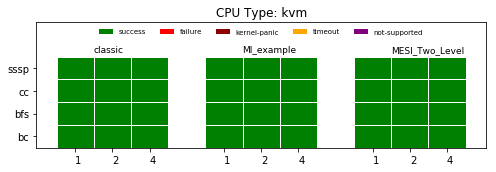

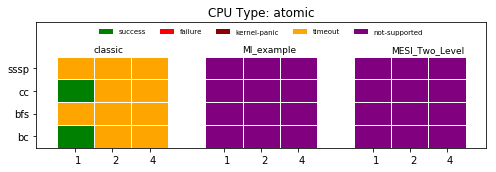

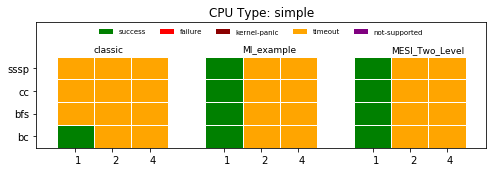

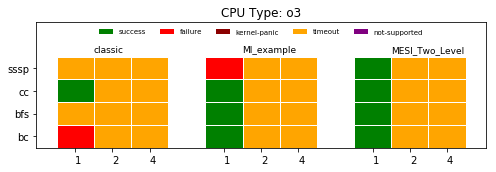

In [305]:
# plotWorkingStat('kvm')
from matplotlib.pyplot import figure
cpus=cpu_types
for cpu in cpus:
#     for boot_typ in Boot_Types:
#     fig_size = plt.rcParams["figure.figsize"]
#     fig_size[0] = 7
#     fig_size[1] = 2.5
    plotWorkingStat(cpu, fig_size[0], fig_size[1])
    #plt.ylabel('Sim Time (seconds)')
    plt.yticks([0.5,1.5,2.5,3.5], ('bc', 'bfs', 'cc', 'sssp'))

    plt.text(0.5, 4.2, '{}'.format(mem_types[0]), fontsize=9)
    plt.text(4.5, 4.2, '{}'.format(mem_types[1]), fontsize=9)
    plt.text(8.5, 4.2, '{}'.format(mem_types[2]), fontsize=9)
#     plt.text(15, 4.2, 'linux-{}'.format(Linux_Kernels[3]), fontsize=9)
#     plt.text(20, 4.2, 'linux-{}'.format(Linux_Kernels[4]), fontsize=9)

    plt.ylim(ymax = 5.5, ymin = 0)
    plt.legend(loc=9, ncol=5, prop={'size': 7}, frameon=0)
    plt.title('CPU Type: {}'.format(cpu))
    plt.tight_layout()
#     plt.savefig('boot_{}_{}.png'.format(mem,boot_typ), format='png', dpi=1000)
# plotWorkingStat('TimingSimple')